In [171]:
import pandas as pd
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv("weather.csv")
df

,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [172]:
weather_mapping = {'sunny': 'Sunny', 'rain': 'Rain', 'overcast': 'Overcast'}
# Create new DataFrame with separate weather columns
df_new = df["Weather"].str.get_dummies()
#df = pd.concat([df, df_new], axis=1)

df_new

,overcast,rainy,sunny
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [173]:
dic = {"play": {"yes": 1, "no": 0}, "windy": {True:1, False:0}}
new = df
new["Play"] = df["Play"].map(dic["play"])
new["Windy"] = df["Windy"].map(dic["windy"])

In [174]:
final = pd.concat([new, df_new], axis=1)
final.drop('Weather', axis=1, inplace=True)
final

,ID,Temp,Humidity,Windy,Play,overcast,rainy,sunny
0,1,85,85,0,0,0,0,1
1,2,80,90,1,0,0,0,1
2,3,83,86,0,1,1,0,0
3,4,70,96,0,1,0,1,0
4,5,68,80,0,1,0,1,0
5,6,65,70,1,0,0,1,0
6,7,64,65,1,1,1,0,0
7,8,72,95,0,0,0,0,1
8,9,69,70,0,1,0,0,1
9,10,75,80,0,1,0,1,0


In [175]:
df.columns

Index(['ID', 'Weather', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14 non-null     int64 
 1   Weather   14 non-null     object
 2   Temp      14 non-null     int64 
 3   Humidity  14 non-null     int64 
 4   Windy     14 non-null     int64 
 5   Play      14 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 804.0+ bytes


In [177]:
df.describe()

,ID,Temp,Humidity,Windy,Play
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,73.571429,81.642857,0.428571,0.642857
std,4.1833,6.571667,10.285218,0.513553,0.497245
min,1.0000,64.000000,65.000000,0.000000,0.000000
25%,4.2500,69.250000,71.250000,0.000000,0.000000
50%,7.5000,72.000000,82.500000,0.000000,1.000000
75%,10.7500,78.750000,90.000000,1.000000,1.000000
max,14.0000,85.000000,96.000000,1.000000,1.000000


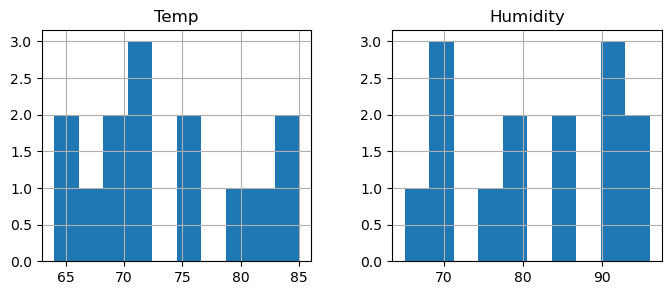

In [178]:
df[["Temp", "Humidity"]].hist(bins=10, figsize=(8,3))
plt.show()

KeyError: 'origin'

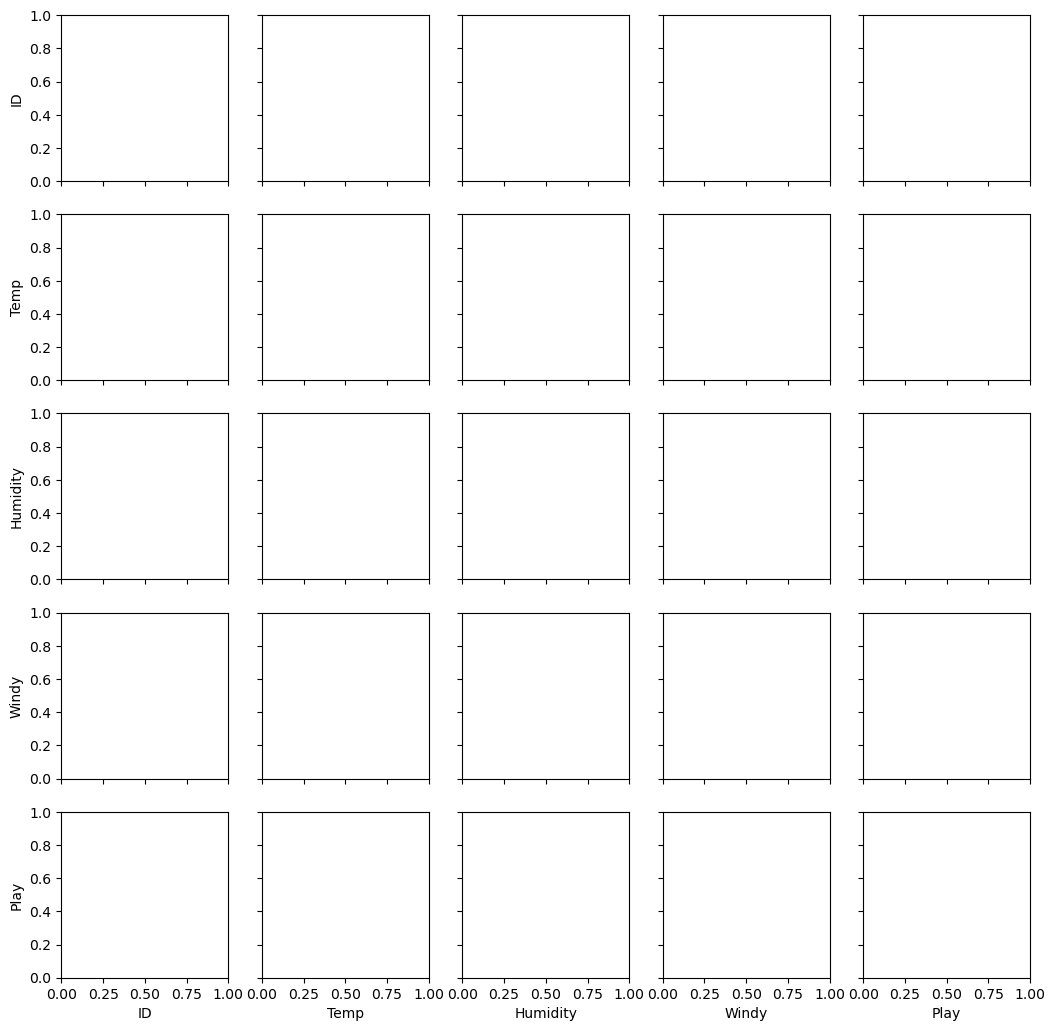

In [179]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
sns.pairplot(df.dropna(), hue='origin')

In [ ]:
possibleWeather = {cap for cap in df["Weather"]}
possibleWeather


{'overcast', 'rainy', 'sunny'}